# <center> Page View Time Series Visualizer </center>
<br/>
<br/>
<br/>

## What is this?
---
This is a freeCodeCamp project for the Data Analysis with Python certification.

Bellow is the project from freeCodeCamp.

> #### <center> Page View Time Series Visualizer <center>
> You will be working on [this project with our Replit starter code.](https://replit.com/github/freeCodeCamp/boilerplate-page-view-time-series-visualizer)
> 
> - Start by importing the project on Replit.
> - Next, you will see a `.replit` window.
> - Select `Use run command` and click the `Done` button.
> We are still developing the interactive instructional part of the Python curriculum. For now, here are some videos on the freeCodeCamp.org YouTube channel that will teach you everything you need to know to complete this project:
> 
> [Python for Everybody Video Course (14 hours)](https://www.freecodecamp.org/news/python-for-everybody/)
> 
> [How to Analyze Data with Python Pandas (10 hours)](https://www.freecodecamp.org/news/how-to-analyze-data-with-python-pandas/])
> 
> For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.
> 
> Use the data to complete the following tasks:
> 
> - Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
> - Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
> - Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
> - Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
> - Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
>
> For each chart, make sure to use a copy of the data frame. Unit tests are written for you under `test_module.py`.
> 
> The boilerplate also includes commands to save and return the image.
> 
> ### Development
> For development, you can use `main.py` to test your functions. Click the "run" button and main.py will run.
> 
> ### Testing
> We imported the tests from `test_module.py` to `main.py` for your convenience. The tests will run automatically whenever you hit the "run" button.
> 
> ### Submitting
> Copy your project's URL and submit it to freeCodeCamp.

### Imports
---

In [489]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

### read csv
--- 

In [490]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])

### Filter out the bottom and top .25 percent 
---

In [491]:
df = df[ ( df['value'] > df['value'].quantile(0.025) ) 
   & ( df['value'] < df['value'].quantile(0.975) )]

### How to Choose dates from the date column
---
&nbsp;&nbsp;&nbsp;&nbsp; This is how you select a specific month and day from the date column using the date time feature of the dataframe.

In [492]:
df[ (df['date'].dt.month == 1) & (df['date'].dt.day == 1) | 
    (df['date'].dt.month == 7) & (df['date'].dt.day == 1)]['date']

53     2016-07-01
237    2017-01-01
418    2017-07-01
602    2018-01-01
783    2018-07-01
967    2019-01-01
1148   2019-07-01
Name: date, dtype: datetime64[ns]

### Draw the line plot 
---

In [493]:
def draw_line_plot():
    # Draw line plot

    ax = sns.lineplot( data=df, x = 'date', y = 'value')
    ax.set_title( 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019' )
    ax.set_xlabel( 'Date' )
    ax.set_ylabel( 'Page Views' )
    

    fig = ax.figure
    fig.set_facecolor( 'white' )
    fig.set_size_inches( (20,5) )
    
    # fig = sns.relplot(data=df, x='date', y='value')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

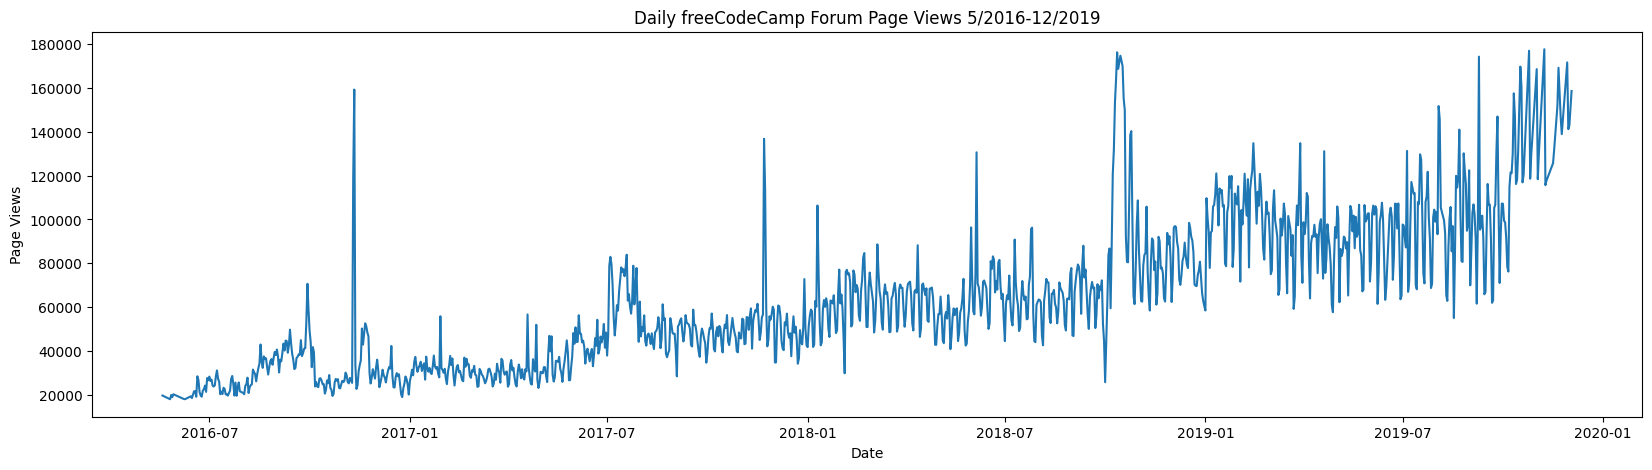

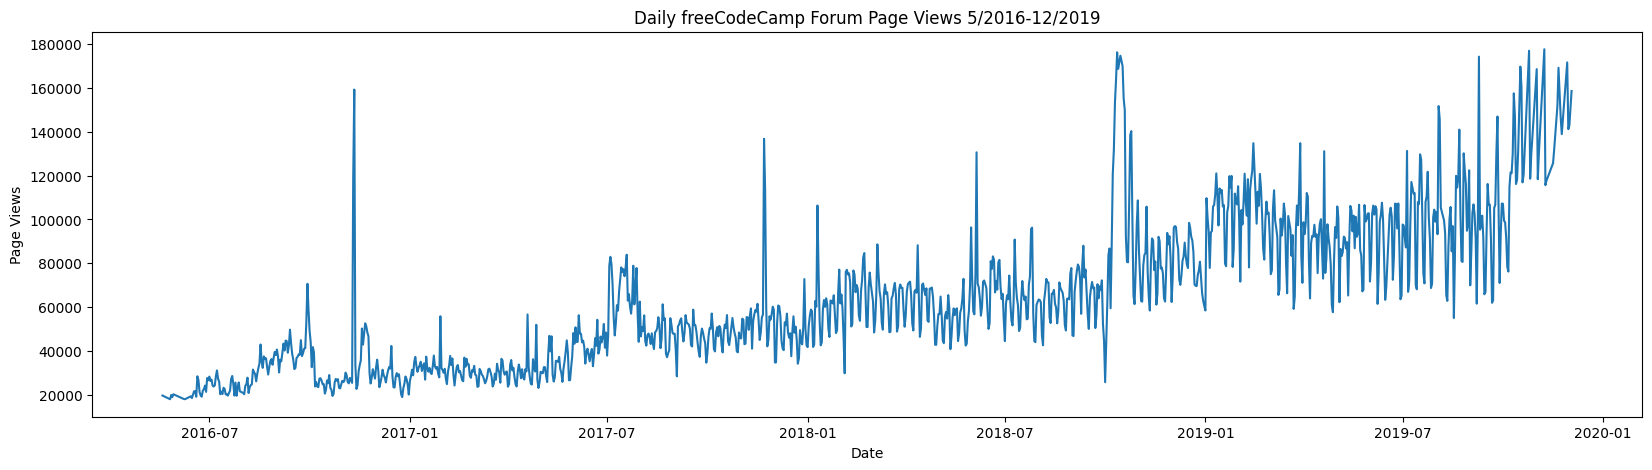

In [494]:
draw_line_plot()

### Quick way to get the average of the months values
---

In [495]:
df_avg = df.groupby( pd.PeriodIndex( df['date'], freq='M' ) ).aggregate( 'mean' )

In [496]:
df_avg.index

PeriodIndex(['2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
             '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
             '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
             '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
             '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
             '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
             '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
             '2019-11', '2019-12'],
            dtype='period[M]', name='date')

In [497]:
for d in df_avg.index:
  print( d )
  print( d.to_timestamp().month_name() )

2016-05
May
2016-06
June
2016-07
July
2016-08
August
2016-09
September
2016-10
October
2016-11
November
2016-12
December
2017-01
January
2017-02
February
2017-03
March
2017-04
April
2017-05
May
2017-06
June
2017-07
July
2017-08
August
2017-09
September
2017-10
October
2017-11
November
2017-12
December
2018-01
January
2018-02
February
2018-03
March
2018-04
April
2018-05
May
2018-06
June
2018-07
July
2018-08
August
2018-09
September
2018-10
October
2018-11
November
2018-12
December
2019-01
January
2019-02
February
2019-03
March
2019-04
April
2019-05
May
2019-06
June
2019-07
July
2019-08
August
2019-09
September
2019-10
October
2019-11
November
2019-12
December


In [498]:
df_avg['year'] = df_avg.index.year

In [499]:
df_avg

,value,year
date,,
2016-05,19432.400000,2016
2016-06,21875.105263,2016
2016-07,24109.678571,2016
2016-08,31049.193548,2016
2016-09,41476.866667,2016
2016-10,27398.322581,2016
2016-11,40448.633333,2016
2016-12,27832.419355,2016
2017-01,32785.161290,2017


In [500]:
df.groupby( pd.PeriodIndex( df['date'], freq='M' ) )['value'].mean()

date
2016-05     19432.400000
2016-06     21875.105263
2016-07     24109.678571
2016-08     31049.193548
2016-09     41476.866667
2016-10     27398.322581
2016-11     40448.633333
2016-12     27832.419355
2017-01     32785.161290
2017-02     31113.071429
2017-03     29369.096774
2017-04     30878.733333
2017-05     34244.290323
2017-06     43577.500000
2017-07     65806.838710
2017-08     47712.451613
2017-09     47376.800000
2017-10     47438.709677
2017-11     57701.566667
2017-12     48420.580645
2018-01     58580.096774
2018-02     65679.000000
2018-03     62693.774194
2018-04     62350.833333
2018-05     56562.870968
2018-06     70117.000000
2018-07     63591.064516
2018-08     62831.612903
2018-09     65941.733333
2018-10    111378.142857
2018-11     78688.333333
2018-12     80047.483871
2019-01    102056.516129
2019-02    105968.357143
2019-03     91214.483871
2019-04     89368.433333
2019-05     91439.903226
2019-06     90435.642857
2019-07     97236.566667
2019-08    102717.31

### Sort by month and average
---

In [501]:
for d, v in df.values:
  print( d )

2016-05-19 00:00:00
2016-05-26 00:00:00
2016-05-27 00:00:00
2016-05-28 00:00:00
2016-05-29 00:00:00
2016-06-07 00:00:00
2016-06-08 00:00:00
2016-06-09 00:00:00
2016-06-14 00:00:00
2016-06-15 00:00:00
2016-06-17 00:00:00
2016-06-18 00:00:00
2016-06-19 00:00:00
2016-06-20 00:00:00
2016-06-21 00:00:00
2016-06-22 00:00:00
2016-06-23 00:00:00
2016-06-24 00:00:00
2016-06-25 00:00:00
2016-06-26 00:00:00
2016-06-27 00:00:00
2016-06-28 00:00:00
2016-06-29 00:00:00
2016-06-30 00:00:00
2016-07-01 00:00:00
2016-07-02 00:00:00
2016-07-03 00:00:00
2016-07-04 00:00:00
2016-07-05 00:00:00
2016-07-06 00:00:00
2016-07-07 00:00:00
2016-07-08 00:00:00
2016-07-09 00:00:00
2016-07-10 00:00:00
2016-07-11 00:00:00
2016-07-12 00:00:00
2016-07-13 00:00:00
2016-07-14 00:00:00
2016-07-15 00:00:00
2016-07-16 00:00:00
2016-07-17 00:00:00
2016-07-18 00:00:00
2016-07-20 00:00:00
2016-07-21 00:00:00
2016-07-22 00:00:00
2016-07-23 00:00:00
2016-07-24 00:00:00
2016-07-25 00:00:00
2016-07-26 00:00:00
2016-07-27 00:00:00


In [502]:
tmpMonth = ''
daysCount = 0
totViews = 0
monthsAvgViews = []
for d, v in df.values :
  if tmpMonth != pd.Timestamp( d ).month_name() :
    if totViews > 0:
      monthsAvgViews.append( [tmpMonth, totViews/daysCount] )
    tmpMonth = d.month_name()
    daysCount = 0
    totViews = 0
  else:
    daysCount += 1
    totViews += v


print( pd.DataFrame(monthsAvgViews) )

            0              1
0         May   19356.500000
1        June   22071.777778
2        July   23951.814815
3      August   31385.933333
4   September   41503.344828
5     October   26672.300000
6    November   40951.827586
7    December   27671.300000
8     January   33005.166667
9    February   31149.703704
10      March   29239.466667
11      April   31124.137931
12        May   34366.433333
13       June   43585.827586
14       July   66736.133333
15     August   47746.700000
16  September   47357.413793
17    October   47725.500000
18   November   58112.965517
19   December   48073.600000
20    January   59139.100000
21   February   65674.407407
22      March   62569.466667
23      April   62562.103448
24        May   56551.466667
25       June   70019.448276
26       July   64225.700000
27     August   62808.666667
28  September   66590.965517
29    October  114546.592593
30   November   78441.000000
31   December   80636.633333
32    January  103508.133333
33   February 

### Draw the bar plot
---

In [503]:
df.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [657]:
days = pd.date_range( start = '1/1/2016', end='12/31/2020', freq='D' ) 
print( days.year )

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', length=1827)


In [752]:

def draw_bar_plot():
    
    # sns.reset_defaults()
    # plt.clf()
    
    
    FONTSIZE = 23

    # Copy and modify data for monthly bar plot
  
    Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    # df_bar should be the average page views per month
    # df_bar = df.copy()
    # df_bar['date'] = pd.to_datetime(df_bar['date'])
    # df_bar.set_index(df_bar['date'])
    # df_bar = pd.DataFrame( df.groupby( pd.PeriodIndex( df['date'], freq='M' ) )['value'].mean() )

    df_bar = df.groupby( pd.PeriodIndex( df['date'], freq='M' ) ).aggregate( 'mean' )

    # Draw bar plot
    print(len( df_bar.index.year ) )
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    # df_bar = df.groupby( ['year','month'] )['value'].aggregate( 'mean' )
    df_bar = df_bar.groupby( ['year','month'], sort=True )['value'].mean()
    df_bar =  df_bar.unstack(fill_value=0) 
    ax = df_bar.plot.bar()
    # ax = sns.barplot( data = df_bar,
    #                   hue='month',
    #                   y='value',
    #                   x='year',
    #                   palette=sns.color_palette(n_colors=12),
    #                   hue_order=Months,
    #                   width=.5,
    #                 )

    print( len([rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)]) )
    
    ax.set_xlabel('Years', fontsize=FONTSIZE)
    ax.set_ylabel('Average Page Views', fontsize = FONTSIZE)
    ax.set_xticklabels( ax.get_xticklabels(), rotation=90, fontsize=FONTSIZE )
    ax.set_yticklabels( ax.get_yticklabels() , fontsize=FONTSIZE )
    ax.legend( Months,title='Months', title_fontsize = FONTSIZE, fontsize = FONTSIZE )

    rex = [rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)] 
    print( len(rex) )
    # ax.legend( title='Months', title_fontsize = FONTSIZE, fontsize = FONTSIZE, labels=Months )

    fig = ax.figure
    fig.set_facecolor( "white" )
    fig.set_size_inches([17,15])
    
    # print( len([rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)]) )
    # print(df_bar)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

44
49
49


C:\Users\meatw\AppData\Local\Temp\ipykernel_15844\3267265040.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels( ax.get_yticklabels() , fontsize=FONTSIZE )


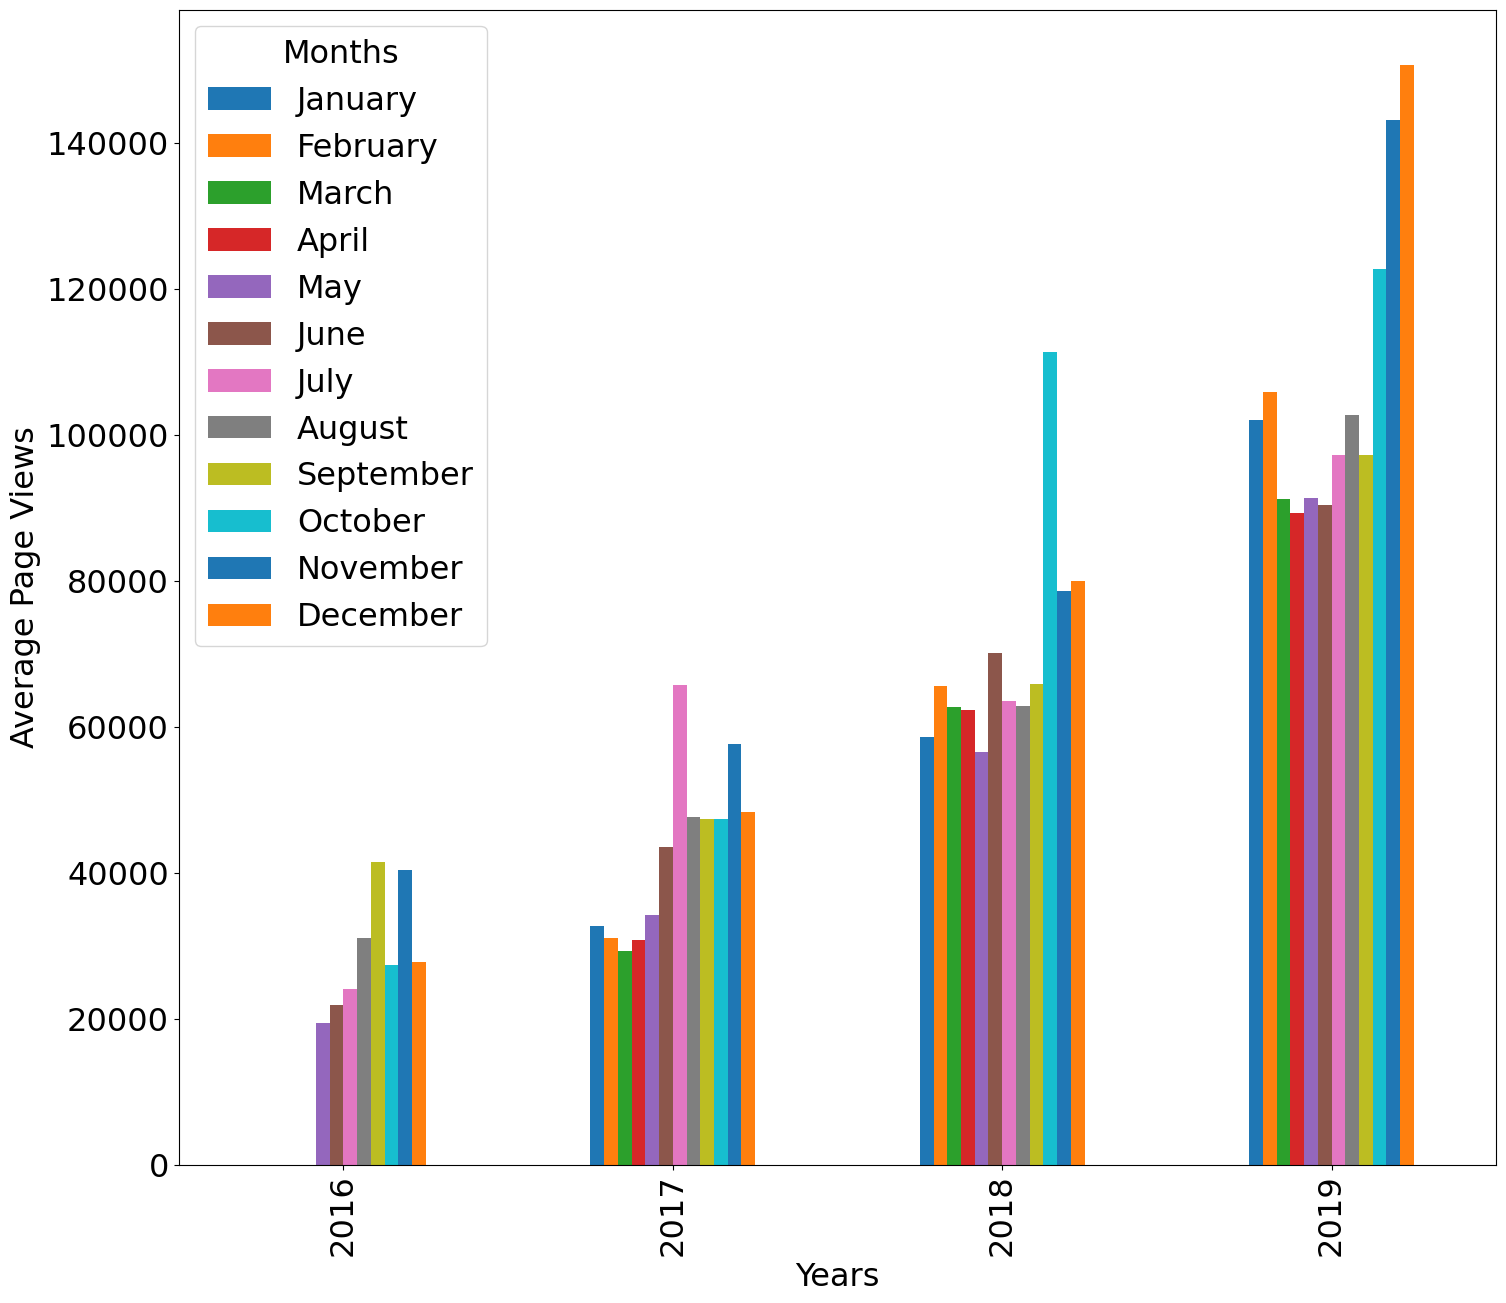

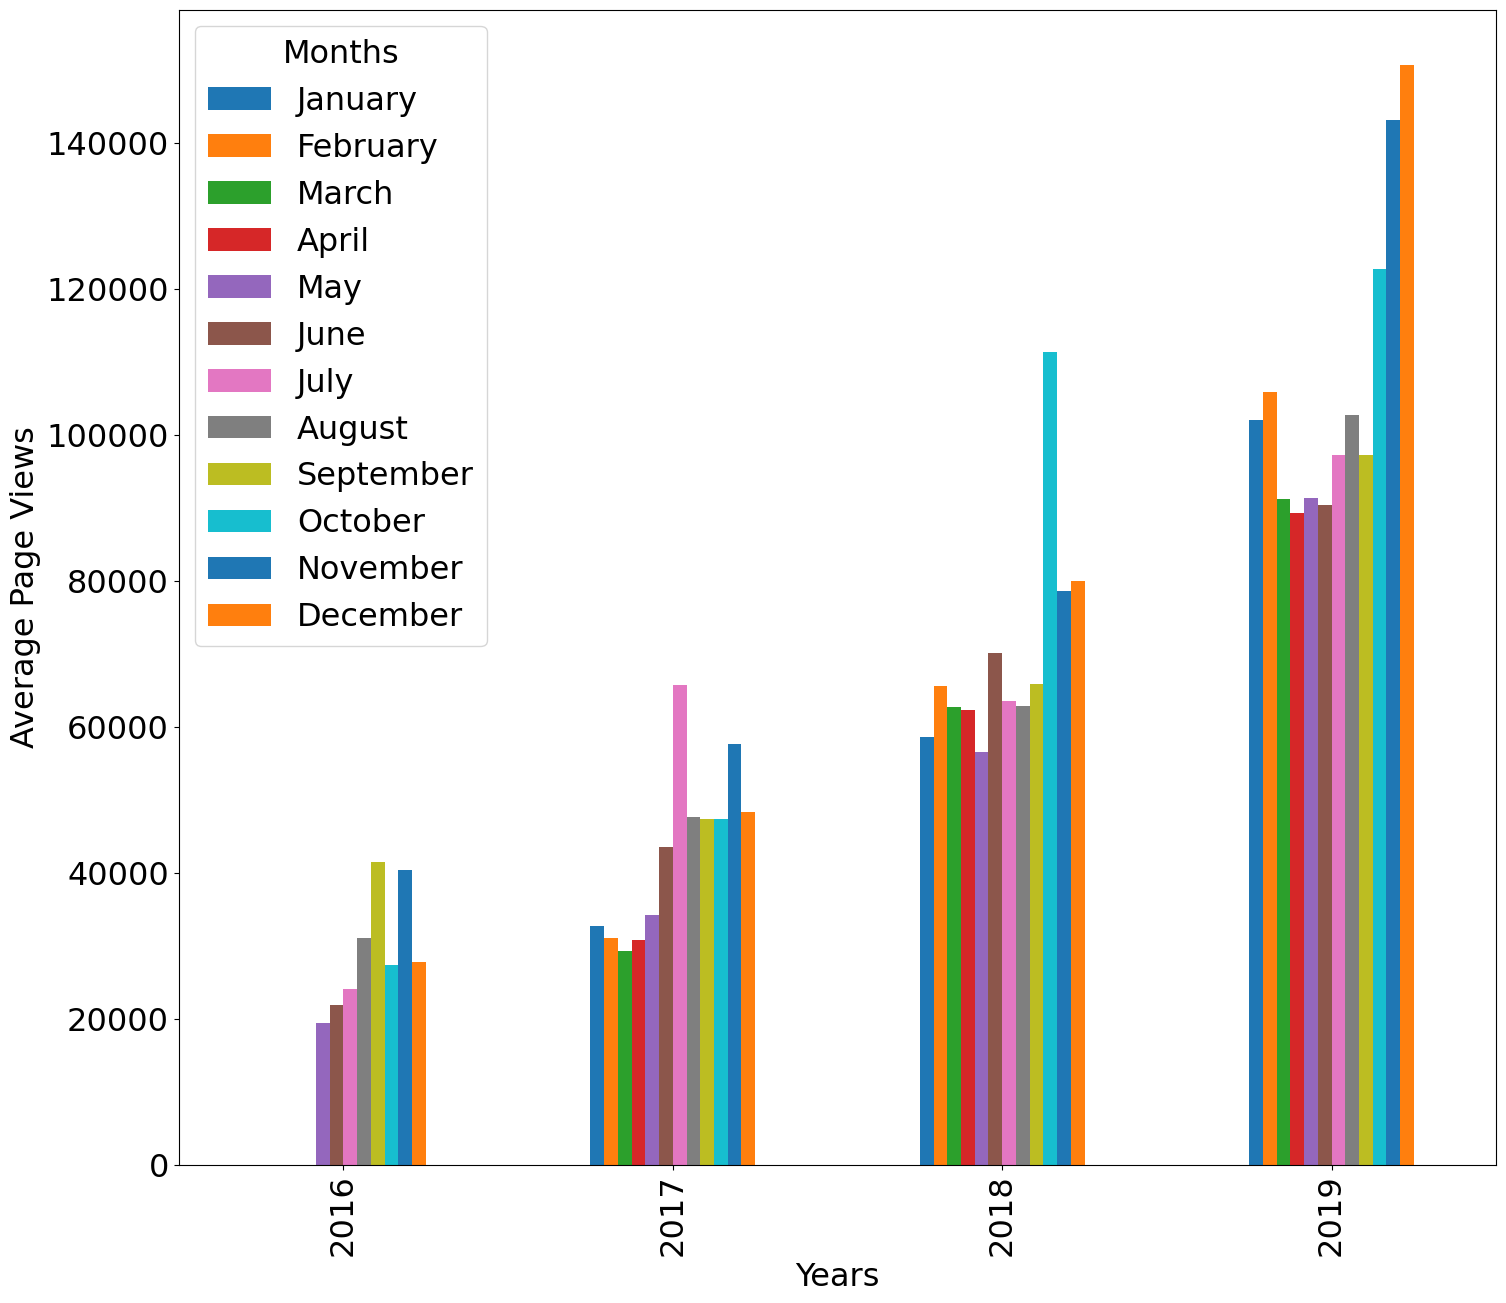

In [753]:
draw_bar_plot()

### Draw the box plot
---

In [506]:
def draw_box_plot():
    plt.clf()

    Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots( 1, 2, figsize=( 30, 10 ) )
    sns.boxplot( ax = axes[0], data=df_box,
                x = 'year',
                y = 'value',
                hue = 'year',
                legend = '',
                palette = sns.color_palette( n_colors=4 )
                ).set_xlabel( 'Year' )
    
    axes[0].set_ylabel( 'Page Views' )
    axes[0].set_title('Year-wise Box Plot (Trend)')

    sns.boxplot(ax = axes[1],
                data = df_box,
                order = Months,
                hue_order=Months,
                x = 'month',
                y = 'value',
                hue = 'month',
                # order =  Months,
                ).set_xlabel( 'Month' )
                
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_ylabel( 'Page Views' )
    
    
    print(df_box)


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

      index       date   value  year month
0        10 2016-05-19   19736  2016   May
1        17 2016-05-26   18060  2016   May
2        18 2016-05-27   19997  2016   May
3        19 2016-05-28   19044  2016   May
4        20 2016-05-29   20325  2016   May
...     ...        ...     ...   ...   ...
1233   1294 2019-11-24  138875  2019   Nov
1234   1299 2019-11-29  171584  2019   Nov
1235   1300 2019-11-30  141161  2019   Nov
1236   1301 2019-12-01  142918  2019   Dec
1237   1303 2019-12-03  158549  2019   Dec

[1238 rows x 5 columns]


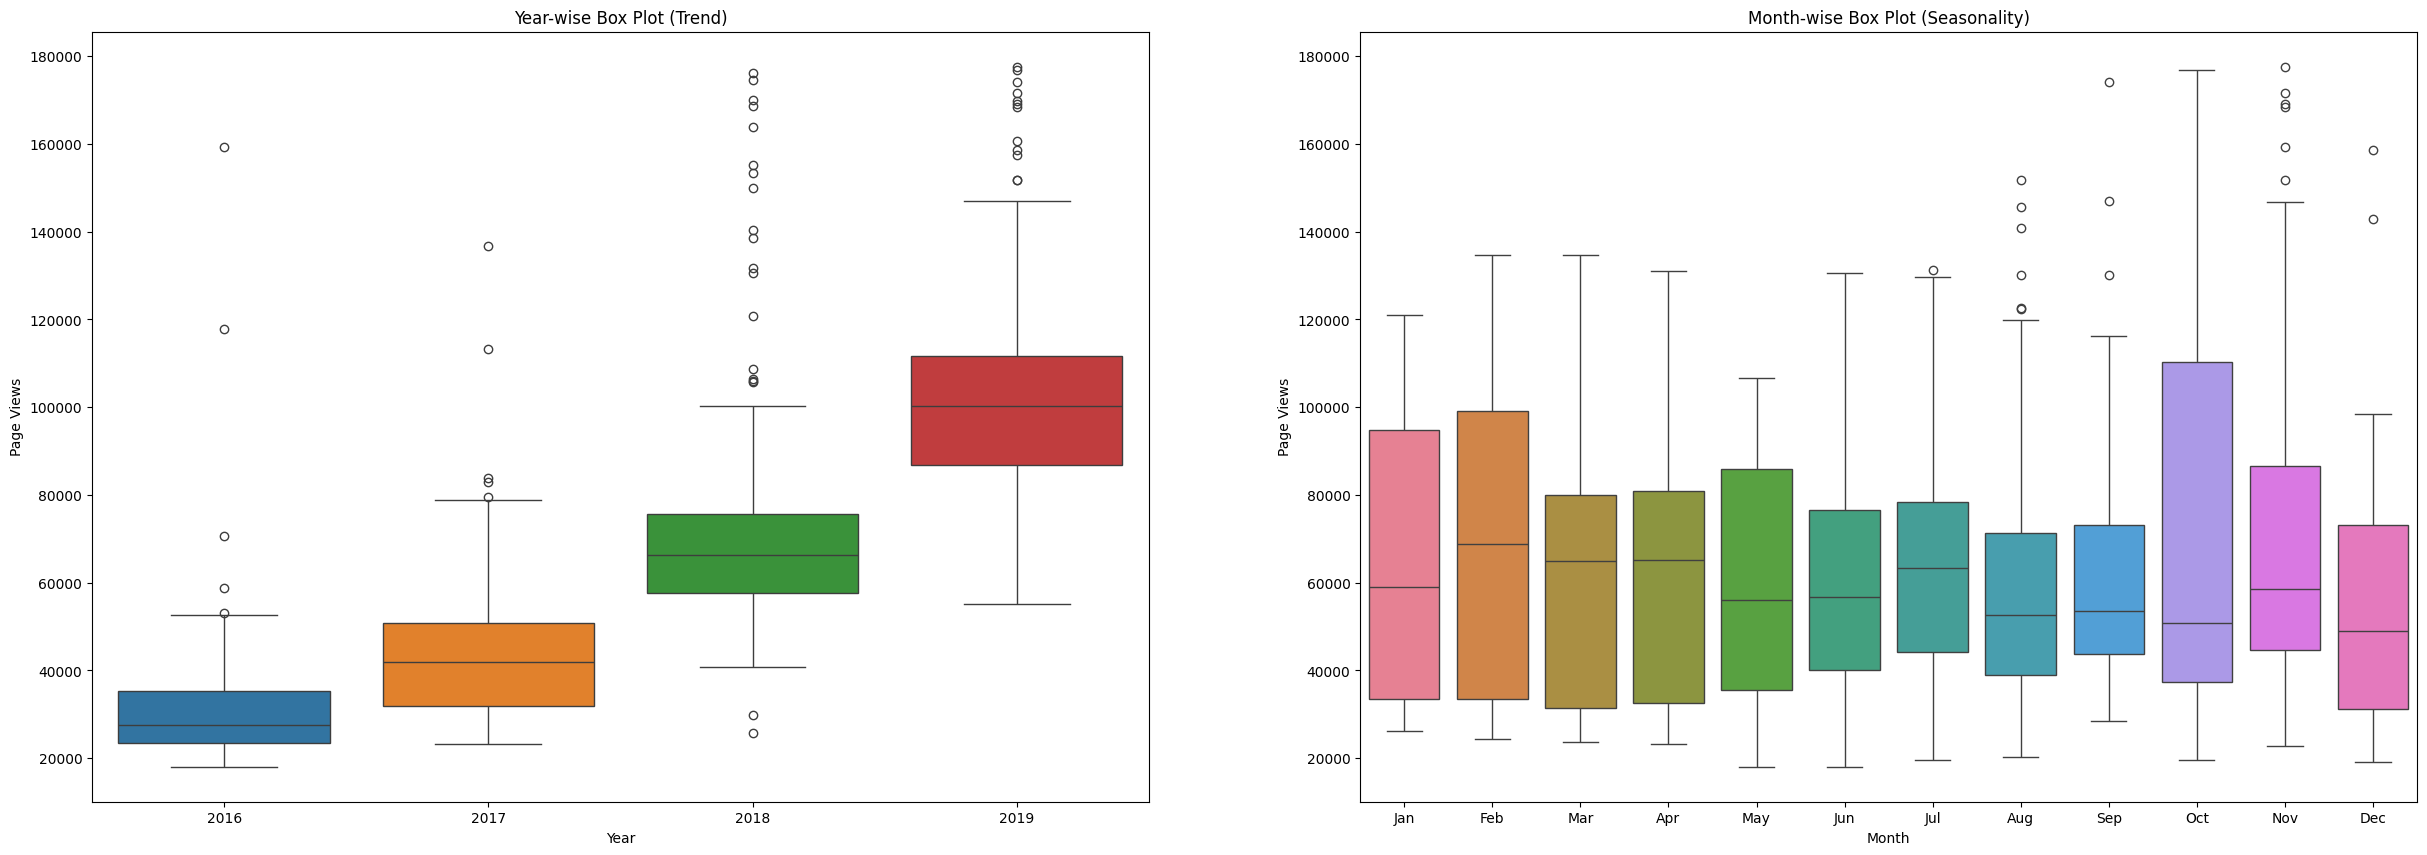

<Figure size 640x480 with 0 Axes>

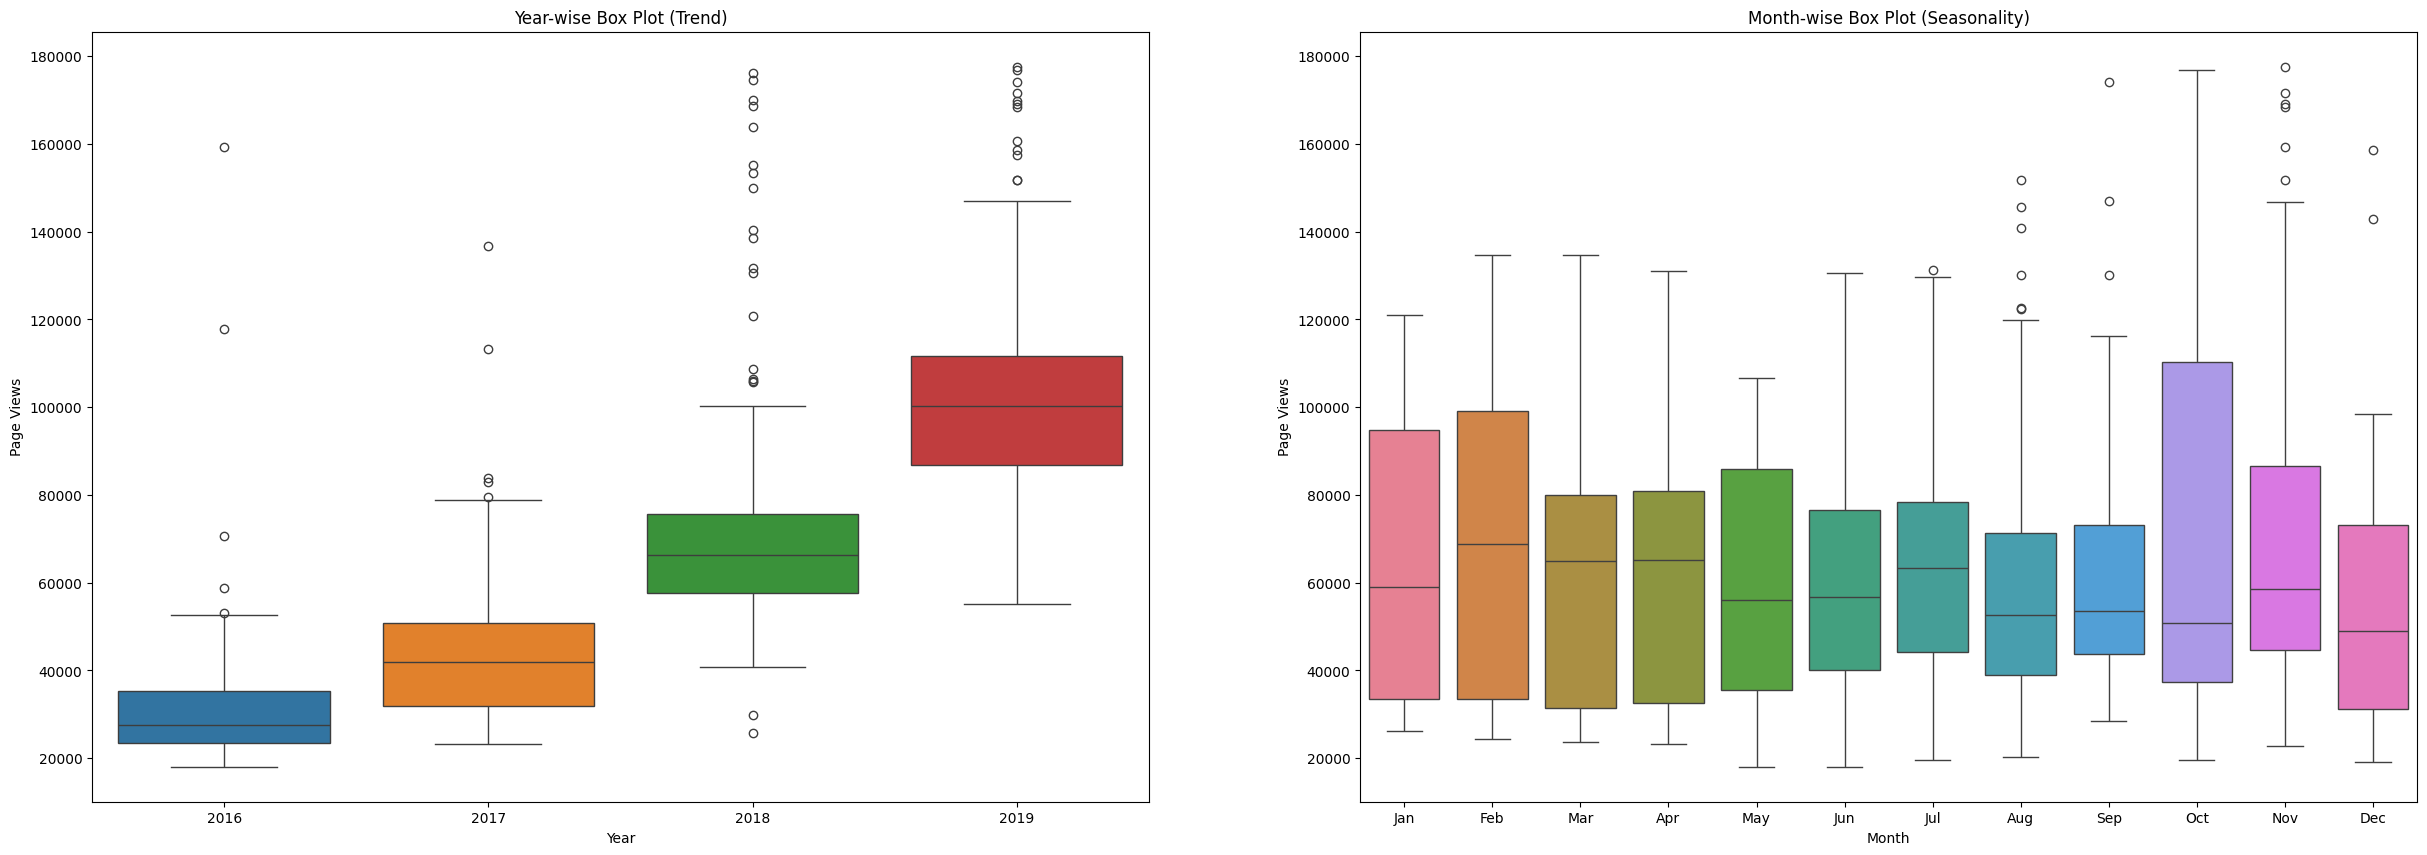

In [507]:
draw_box_plot()

In [512]:
def draw_box_p(pal):
    # plt.clf()

    Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    
    ax = sns.boxplot(
                data = df_box,
                x = 'month',
                y = 'value',
                hue = 'month',
                order =  Months,
                palette= sns.color_palette(palette=pal,  n_colors=12 )
                )

    ax.set_title('')
    print( sns.color_palette )
    print(df_box)
    fig = ax.figure

    # Save image and return fig (don't change this part)
    p = 'box_plot' + pal + '.png'
    fig.savefig(p)
    return fig

In [511]:
# palettes = [ 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',  'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',  'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',  'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',  'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r',  'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',  'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',  'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',  'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',  'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r',  'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r',  'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r',  'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r','tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo',  'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis',  'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# for p in palettes:
#   draw_box_p(p)

In [ ]:
for c in sns.color_palette()[:-1]:
  print( c )

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
(1.0, 0.4980392156862745, 0.054901960784313725)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
(0.5803921568627451, 0.403921568627451, 0.7411764705882353)
(0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
(0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
(0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
